In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica 

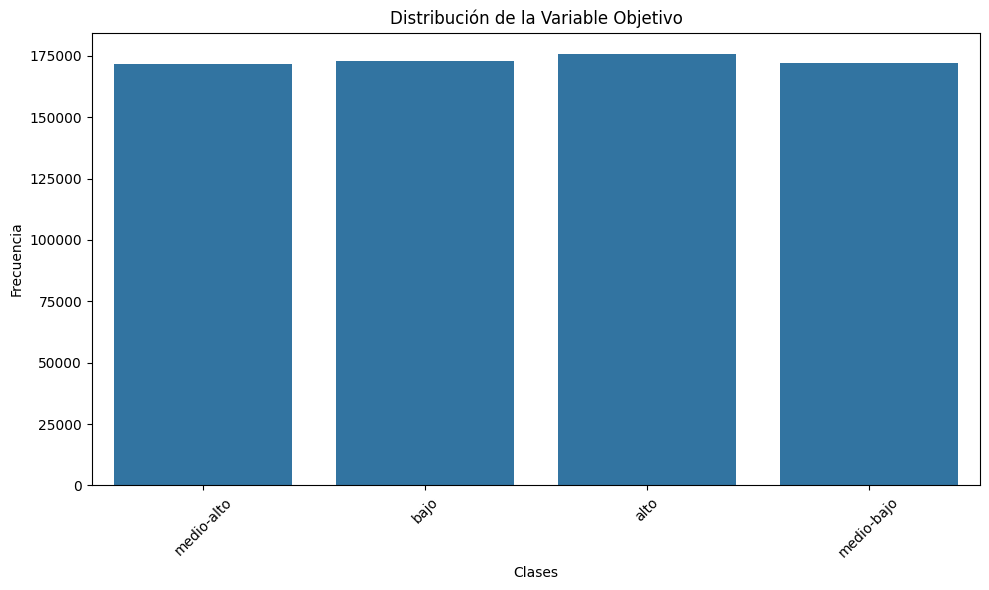


Valores nulos después de la imputación:
ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


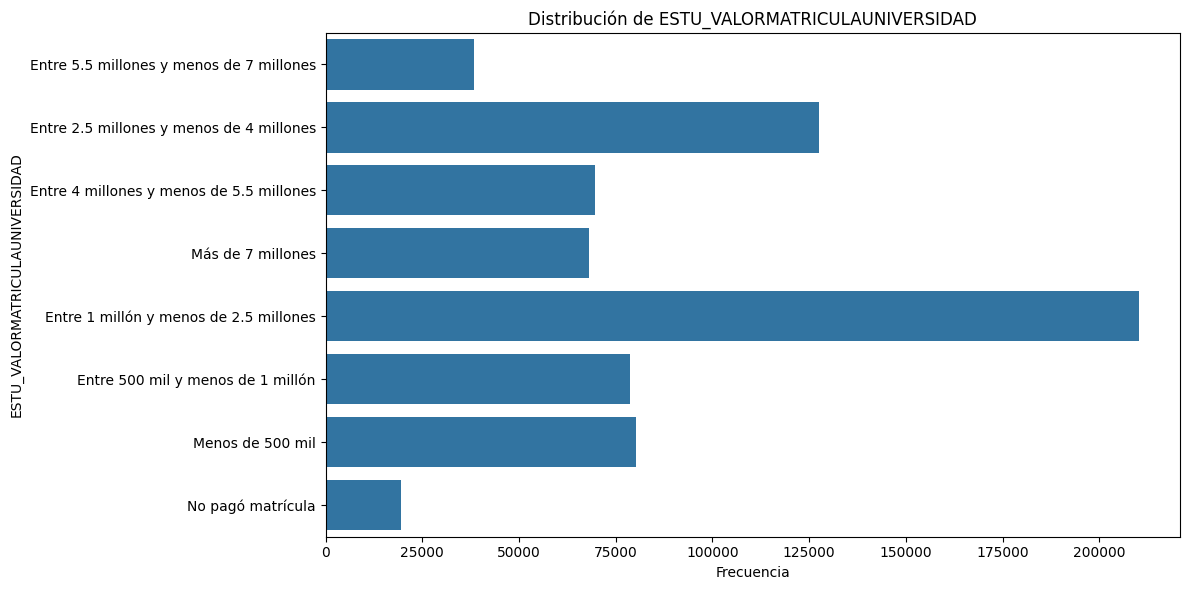

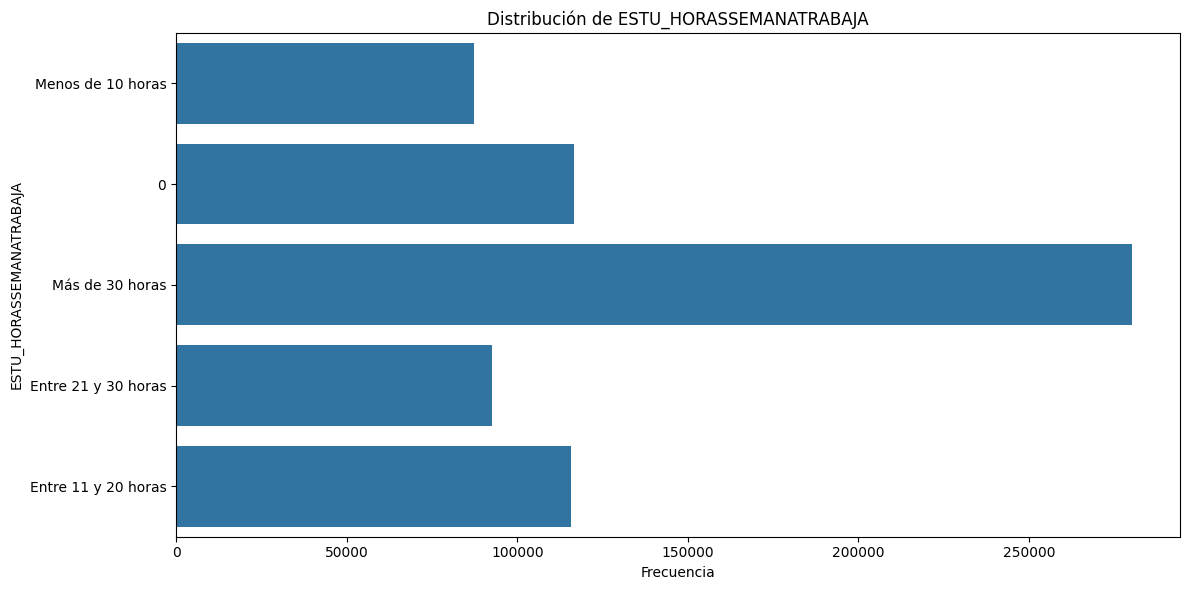

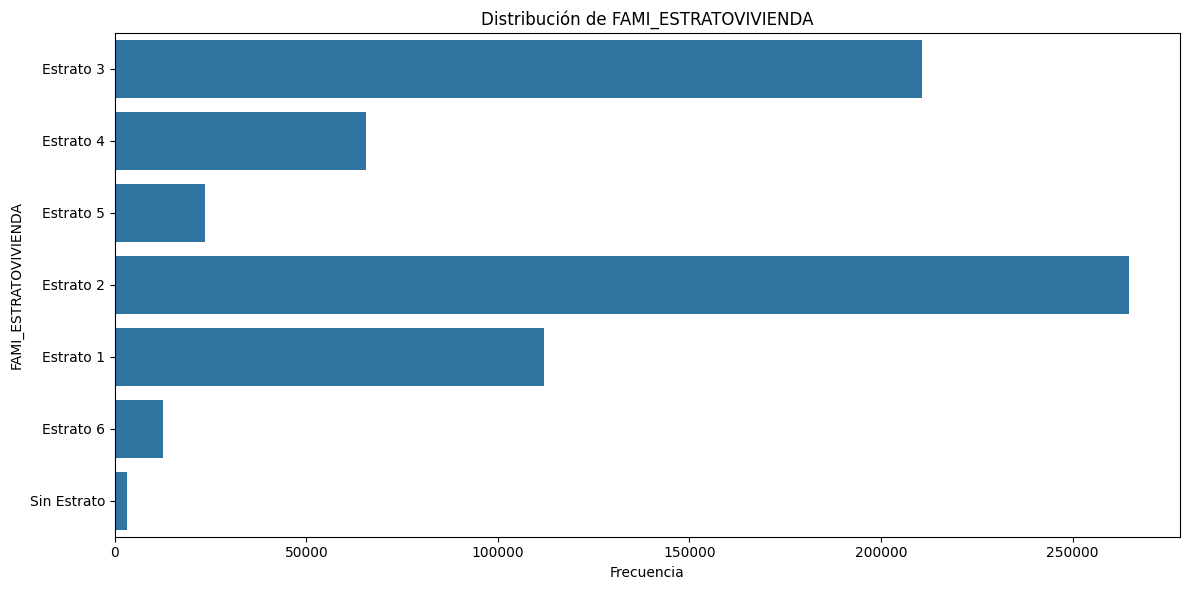

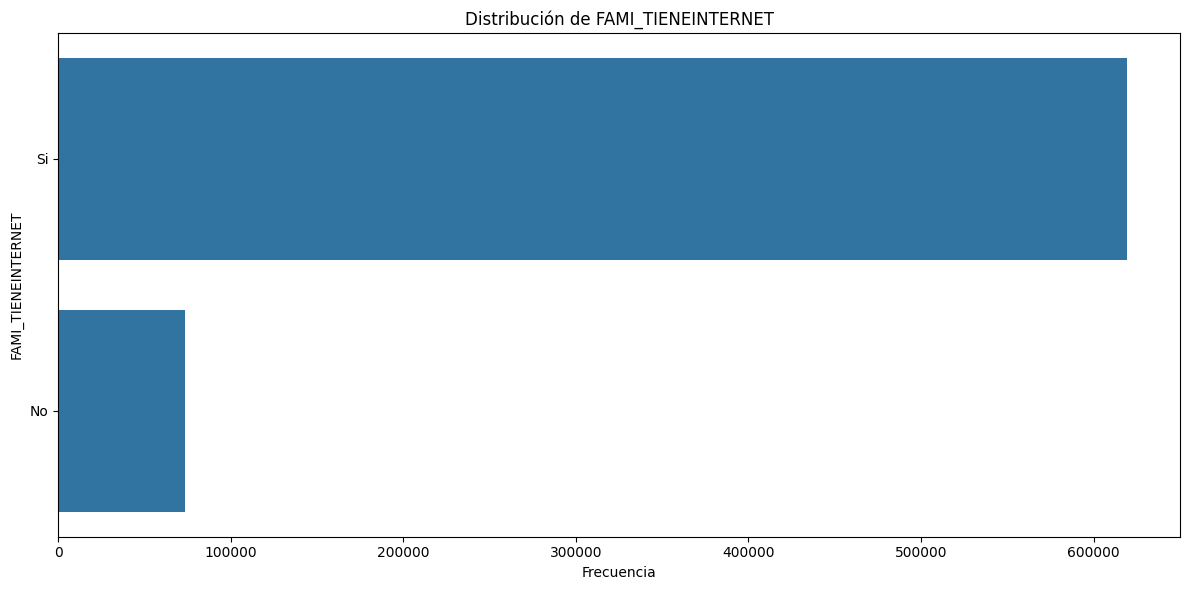

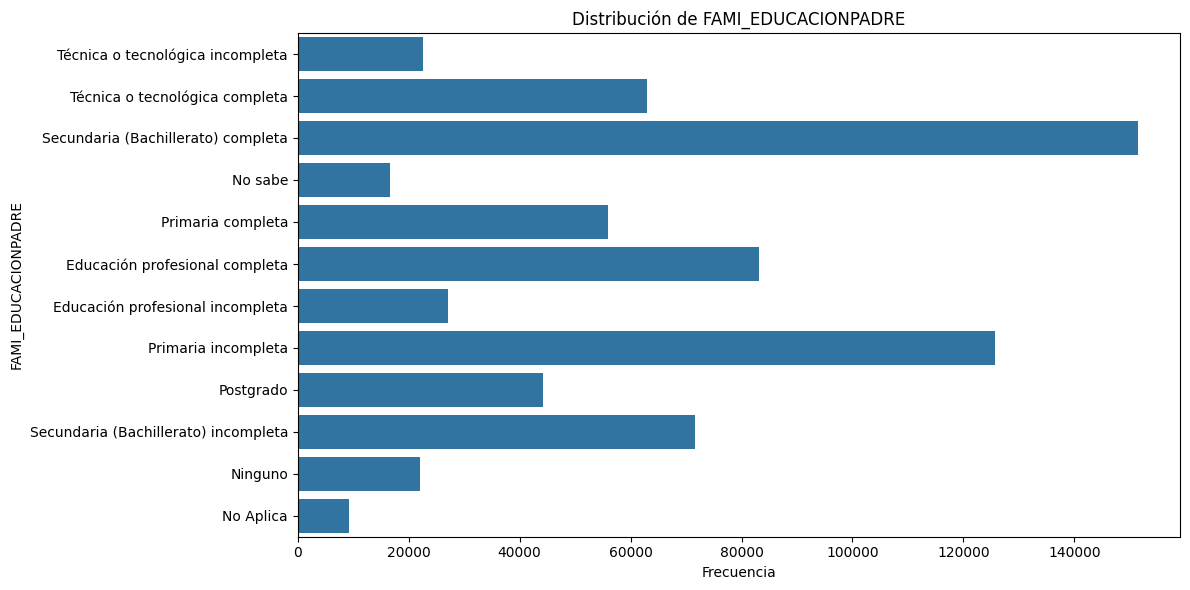

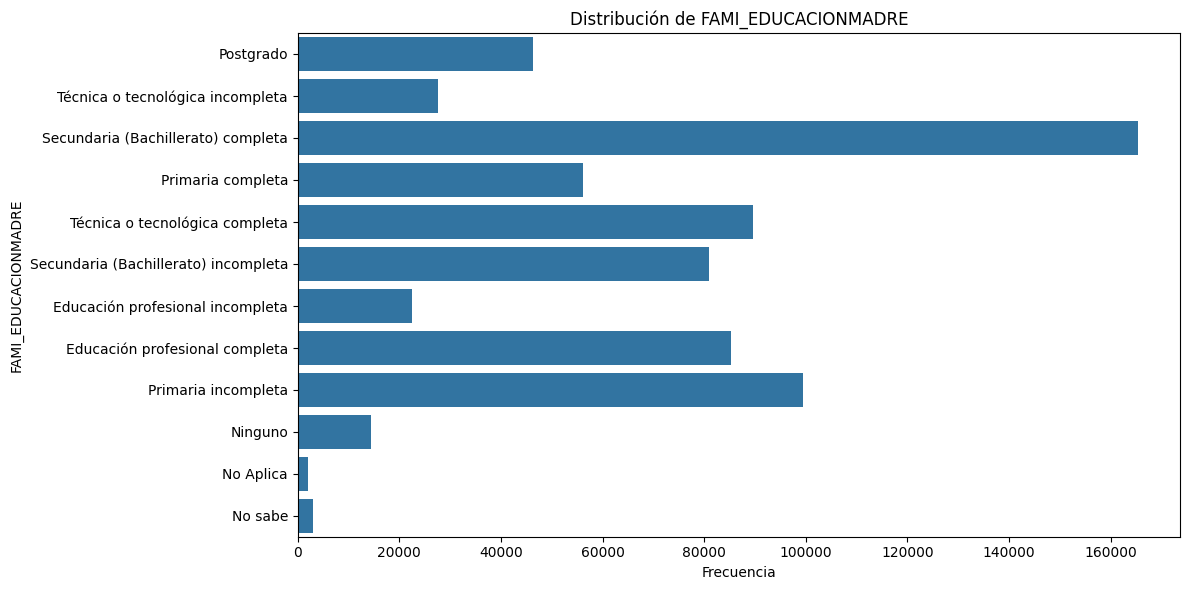

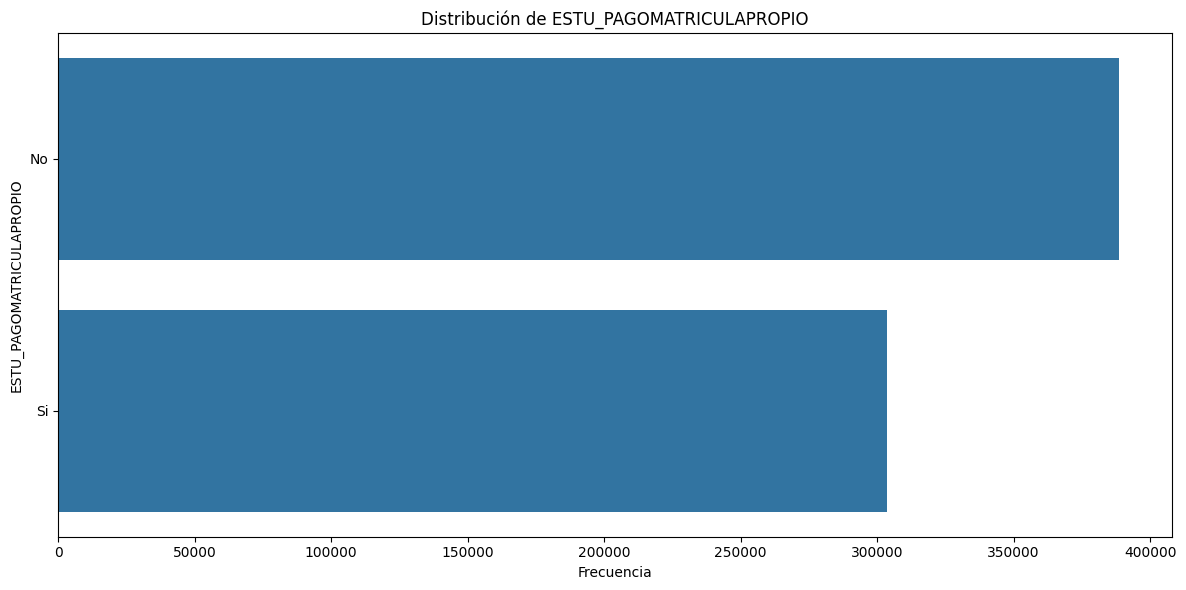

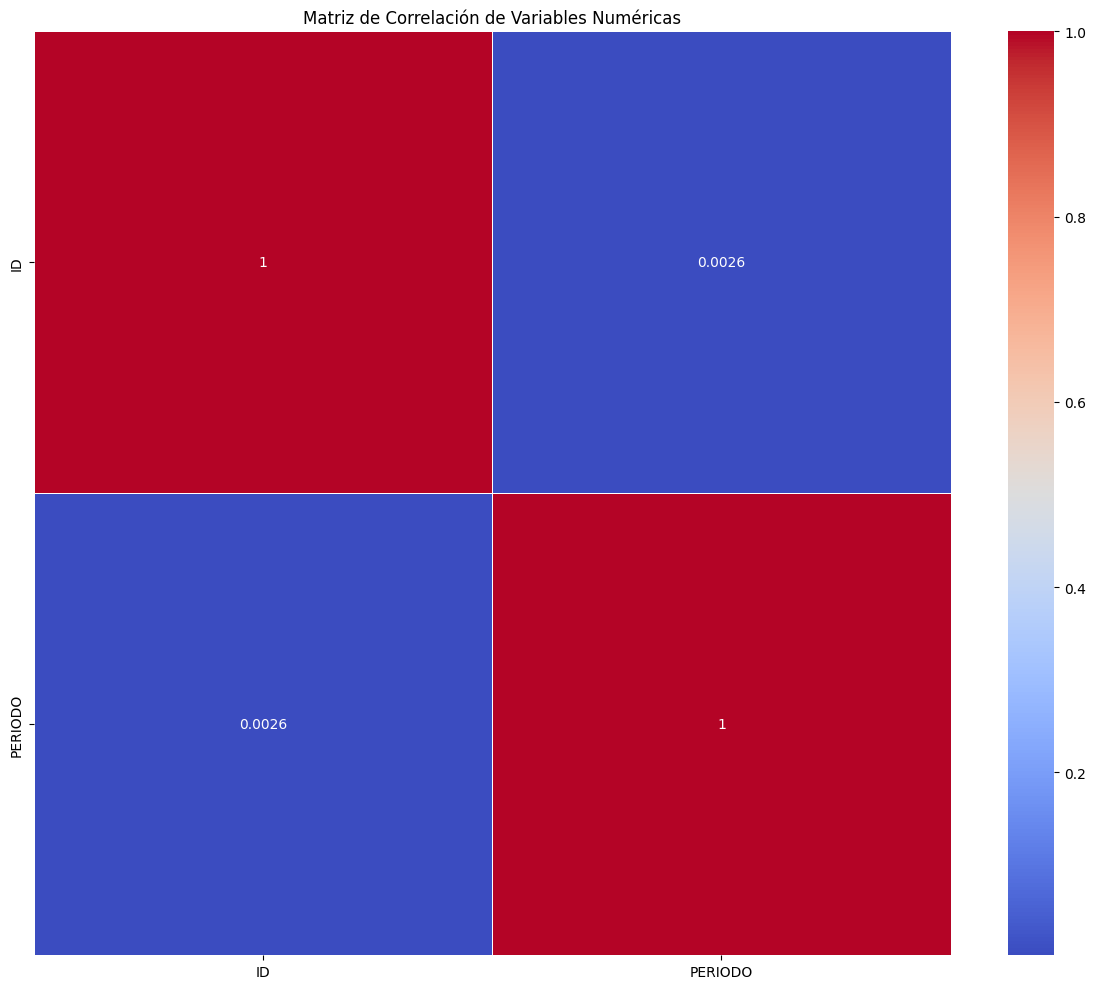



--- CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS ---

1. Resumen General de los Datos:
   - Número total de registros: 692500
   - Número de variables: 12
   - Tipos de variables:
     - Numéricas: ['ID', 'PERIODO']
     - Categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']

2. Análisis de Valores Nulos:
   - Variables con mayor porcentaje de valores nulos:

3. Variable Objetivo (RENDIMIENTO_GLOBAL):
   - Distribución de clases:
     alto: 25.36%
     bajo: 24.98%
     medio-bajo: 24.88%
     medio-alto: 24.78%

4. Variables Categóricas:
   - ESTU_VALORMATRICULAUNIVERSIDAD:
     - Categoría más común: Entre 1 millón y menos de 2.5 millones (30.37%)
   - ESTU_HORASSEMANATRABAJA:
     - Categoría más común: Más de 30 horas (40.46%)
   - FAMI_ESTRATOVIVIENDA:
     - Categor

In [7]:
# 01_exploracion.ipynb

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
data = pd.read_csv("/content/drive/MyDrive/udea-ai4eng-20242/train.csv")  # Asegúrate de usar la ruta correcta

# Mostrar las primeras filas y la información del DataFrame
print(data.head())
print(data.info())

# Estadísticas descriptivas para variables numéricas
print(data.describe())

# Valores nulos por columna
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x='RENDIMIENTO_GLOBAL', data=data)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Función para imputar valores categóricos con la moda
def impute_categorical(column):
    return column.fillna(column.mode()[0])

# Imputar valores nulos
categorical_columns = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
                       'ESTU_PAGOMATRICULAPROPIO']

for col in categorical_columns:
    data[col] = impute_categorical(data[col])

# Verificar valores nulos después de la imputación
print("\nValores nulos después de la imputación:")
print(data.isnull().sum())

# Visualización de variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.ylabel(col)
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Análisis de correlación para variables numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()
# Sección de Conclusiones
print("\n\n--- CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS ---\n")

# 1. Resumen General de los Datos
print("1. Resumen General de los Datos:")
print(f"   - Número total de registros: {len(data)}")
print(f"   - Número de variables: {len(data.columns)}")
print("   - Tipos de variables:")
print(f"     - Numéricas: {list(data.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"     - Categóricas: {list(data.select_dtypes(include=['object']).columns)}")

# 2. Análisis de Valores Nulos
print("\n2. Análisis de Valores Nulos:")
null_counts = data.isnull().sum()
print("   - Variables con mayor porcentaje de valores nulos:")
for col in null_counts[null_counts > 0].sort_values(ascending=False).index:
    print(f"     {col}: {null_counts[col] / len(data):.2%}")

# 3. Variable Objetivo (RENDIMIENTO_GLOBAL)
print("\n3. Variable Objetivo (RENDIMIENTO_GLOBAL):")
target_dist = data['RENDIMIENTO_GLOBAL'].value_counts(normalize=True)
print("   - Distribución de clases:")
for clase, prop in target_dist.items():
    print(f"     {clase}: {prop:.2%}")

# 4. Variables Categóricas
print("\n4. Variables Categóricas:")
for col in categorical_columns:
    print(f"   - {col}:")
    value_counts = data[col].value_counts(normalize=True)
    print(f"     - Categoría más común: {value_counts.index[0]} ({value_counts.iloc[0]:.2%})")
    rare_categories = value_counts[value_counts < 0.01]
    if not rare_categories.empty:
        print(f"     - Categorías poco representadas (<1%): {list(rare_categories.index)}")

# 5. Correlaciones entre Variables Numéricas
print("\n5. Correlaciones entre Variables Numéricas:")
corr_matrix = data[numeric_columns].corr()
top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_corr = top_corr[top_corr != 1.0][:3]  # Top 3 correlaciones
print("   - Correlaciones más fuertes observadas:")
for (var1, var2), corr in top_corr.items():
    print(f"     {var1} y {var2}: {corr:.2f}")

# 6. Insights Clave (a completar manualmente)
print("\n6. Insights Clave:")
print("   - [Completar con insights específicos basados en el análisis]")

# 7. Próximos Pasos Recomendados (a completar manualmente)
print("\n7. Próximos Pasos Recomendados:")
print("   - [Completar con recomendaciones basadas en los hallazgos]")

# 8. Limitaciones del Análisis Actual (a completar manualmente)
print("\n8. Limitaciones del Análisis Actual:")
print("   - [Completar con limitaciones identificadas en el análisis]")

# Guardar las conclusiones en un archivo de texto
with open('conclusiones_eda.txt', 'w') as f:
    f.write("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS\n\n")
    # Aquí puedes escribir todas las conclusiones en el archivo
    # Usa f.write() para cada línea de conclusiones

print("\nLas conclusiones han sido guardadas en 'conclusiones_eda.txt'")
